# Importing And Merging Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import itertools
import statsmodels.api as sm
from datetime import timedelta
from  pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from time import time

In [4]:
df1 = pd.read_csv(r"C:\Users\shriy\OneDrive\Desktop\infosys\ProductA.csv",index_col=0,)
df1.head()

,Quantity
Day Index,
01-12-2021,14
02-12-2021,10
03-12-2021,13
04-12-2021,22
05-12-2021,33


In [5]:
df2 = pd.read_csv(r"C:\Users\shriy\OneDrive\Desktop\infosys\ProductA_fb_impressions.csv")
df2.head()

,Day Index,Impressions
0,01-12-2021,620
1,02-12-2021,890
2,03-12-2021,851
3,04-12-2021,881
4,05-12-2021,678


In [6]:
df3 = pd.read_csv(r"C:\Users\shriy\OneDrive\Desktop\infosys\ProductA_google_clicks.csv")
df3.head()

,Day Index,Clicks
0,01-12-2021,445
1,02-12-2021,433
2,03-12-2021,424
3,04-12-2021,427
4,05-12-2021,451


In [7]:
df = pd.merge(pd.merge(df1, df2, on='Day Index'), df3, on='Day Index')
df.head()

,Day Index,Quantity,Impressions,Clicks
0,01-12-2021,14,620,445
1,02-12-2021,10,890,433
2,03-12-2021,13,851,424
3,04-12-2021,22,881,427
4,05-12-2021,33,678,451


# Graph Plottings

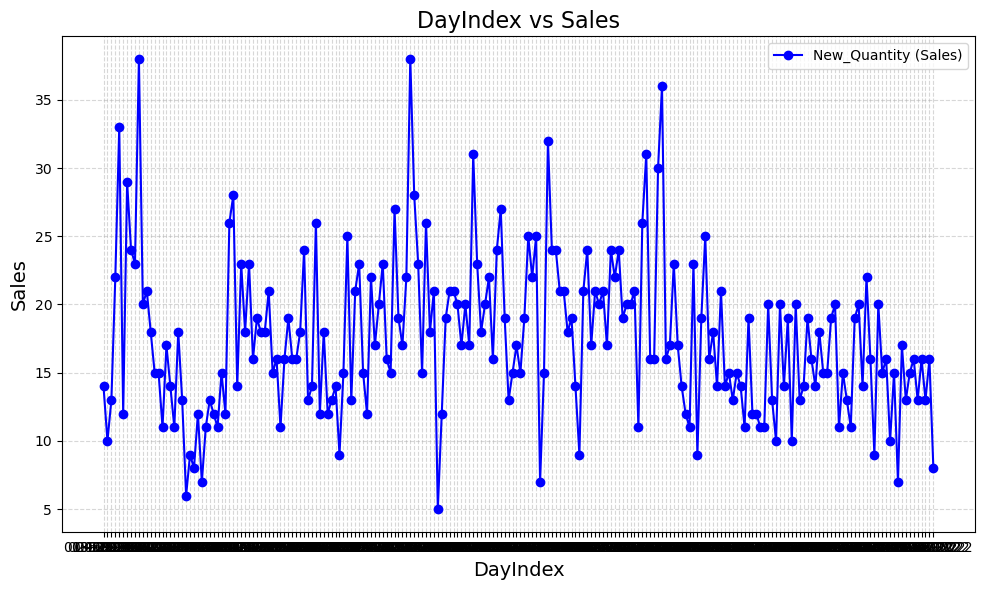

In [9]:
# Plot for DayIndex vs Quantity
plt.figure(figsize=(10, 6))
plt.plot(df['Day Index'], df['Quantity'], marker='o', linestyle='-', color='blue', label='New_Quantity (Sales)')
plt.title('DayIndex vs Sales', fontsize=16)
plt.xlabel('DayIndex', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


 * Fluctuating Sales: The graph shows a clear pattern of fluctuating sales over time. There are periods of high sales followed by periods of low sales, with no consistent upward or downward trend. This suggests that factors other than time might be influencing sales.
 * No Clear Correlation: There appears to be no strong correlation between the DayIndex and sales. This indicates that the day of the week or the day of the month doesn't have a significant impact on sales. Other factors, such as promotions, seasonality, or external events, might be driving the sales fluctuations.
 * Potential Seasonality: While the graph doesn't clearly show seasonal patterns, it's possible that there are underlying seasonal variations in sales that are not immediately apparent. Further analysis, such as comparing sales data from different years or analyzing sales by month, could reveal potential seasonal trends.

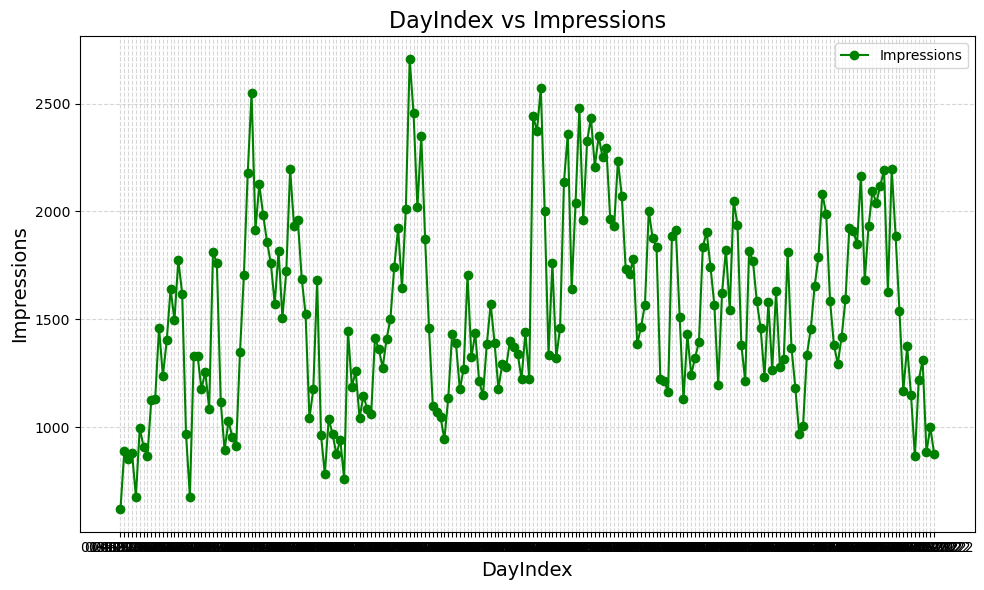

In [11]:
# Plot for DayIndex vs Impressions
plt.figure(figsize=(10, 6))
plt.plot(df['Day Index'], df['Impressions'], marker='o', linestyle='-', color='green', label='Impressions')
plt.title('DayIndex vs Impressions', fontsize=16)
plt.xlabel('DayIndex', fontsize=14)
plt.ylabel('Impressions', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

 * Fluctuating Impressions: The graph shows a clear pattern of fluctuating impressions over time. There are periods of high impressions followed by periods of low impressions, with no consistent upward or downward trend. This suggests that factors other than time might be influencing impressions.
 * No Clear Correlation: There appears to be no strong correlation between the DayIndex and impressions. This indicates that the day of the week or the day of the month doesn't have a significant impact on impressions. Other factors, such as promotions, seasonality, or external events, might be driving the fluctuations in impressions.
 * Potential Seasonality: While the graph doesn't clearly show seasonal patterns, it's possible that there are underlying seasonal variations in impressions that are not immediately apparent. Further analysis, such as comparing impressions data from different years or analyzing impressions by month, could reveal potential seasonal trends.

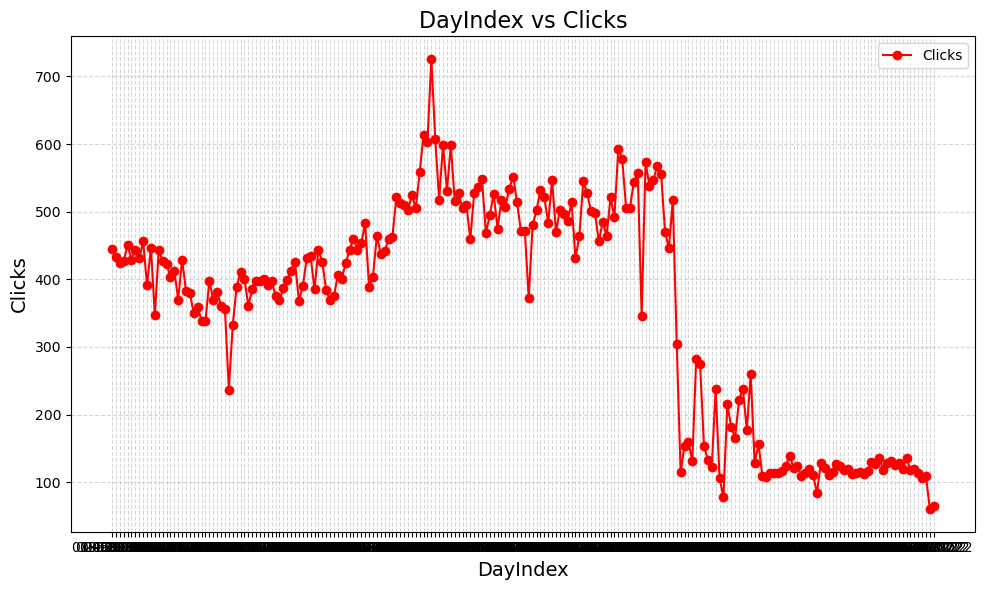

In [13]:
# Plot for DayIndex vs Clicks
plt.figure(figsize=(10, 6))
plt.plot(df['Day Index'], df['Clicks'], marker='o', linestyle='-', color='red', label='Clicks')
plt.title('DayIndex vs Clicks', fontsize=16)
plt.xlabel('DayIndex', fontsize=14)
plt.ylabel('Clicks', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

 * Fluctuating Clicks: The graph shows a clear pattern of fluctuating clicks over time. There are periods of high clicks followed by periods of low clicks, with no consistent upward or downward trend. This suggests that factors other than time might be influencing clicks.
 * No Clear Correlation: There appears to be no strong correlation between the DayIndex and clicks. This indicates that the day of the week or the day of the month doesn't have a significant impact on clicks. Other factors, such as promotions, seasonality, or external events, might be driving the fluctuations in clicks.
 * Potential Seasonality: While the graph doesn't clearly show seasonal patterns, it's possible that there are underlying seasonal variations in clicks that are not immediately apparent. Further analysis, such as comparing clicks data from different years or analyzing clicks by month, could reveal potential seasonal trends.

# Basic Checks

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day Index    212 non-null    object
 1   Quantity     212 non-null    int64 
 2   Impressions  212 non-null    int64 
 3   Clicks       212 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.8+ KB


In [17]:
# Check for duplicate rows 
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [Day Index, Quantity, Impressions, Clicks]
Index: []


# Missing Value Check

In [19]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Day Index      0
Quantity       0
Impressions    0
Clicks         0
dtype: int64


# Outlier Detection And Manupulation

C:\Users\shriy\AppData\Local\Temp\ipykernel_43524\309812154.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])


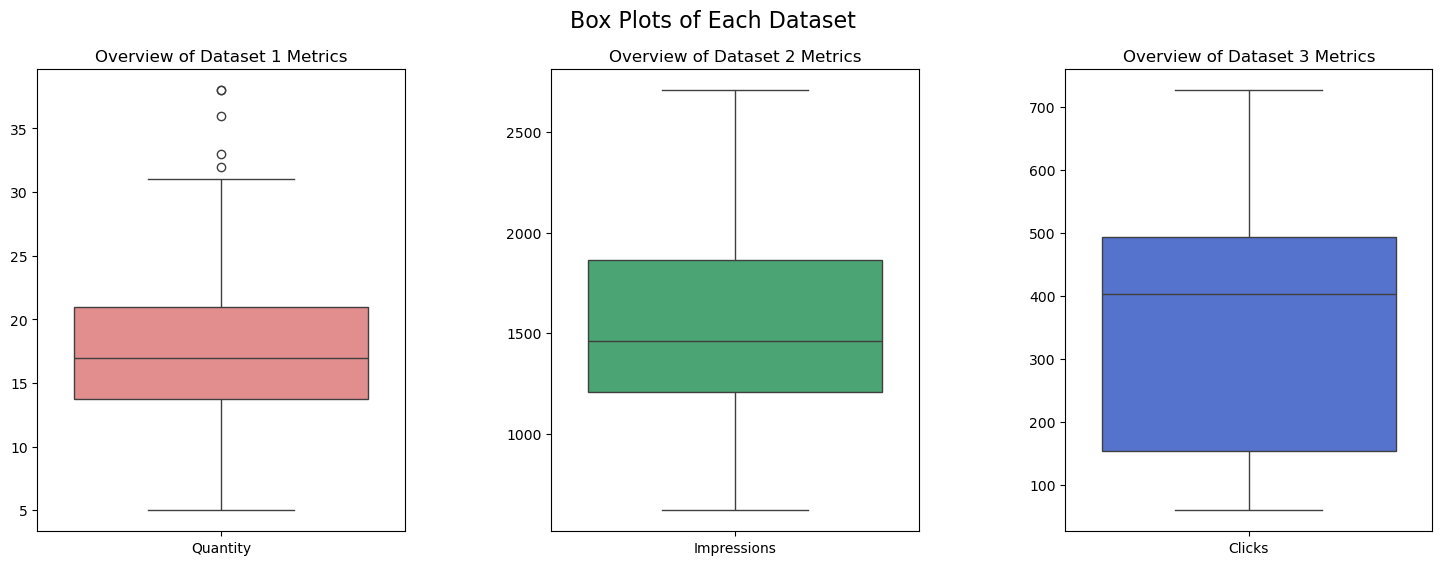

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), gridspec_kw={'wspace': 0.4})

# Plot for Dataset 1
sns.boxplot(data=df1, ax=axes[0], color='lightcoral')
axes[0].set_title('Overview of Dataset 1 Metrics')

# Plot for Dataset 2
sns.boxplot(data=df2, ax=axes[1], color='mediumseagreen')
axes[1].set_title('Overview of Dataset 2 Metrics')

# Plot for Dataset 3
sns.boxplot(data=df3, ax=axes[2], color='royalblue')
axes[2].set_title('Overview of Dataset 3 Metrics')

plt.suptitle('Box Plots of Each Dataset', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 1])  
plt.show()



In [22]:
# Columns to check for outliers
columns_to_check = ['Quantity', 'Impressions', 'Clicks']

# Dictionary to store outlier information
outliers_info = {}

for column in columns_to_check:
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_info[column] = {
        "lower_bound": lower_bound,
        "upper_bound": upper_bound,
        "outliers_count": outliers.shape[0],
        "outliers": outliers[[column, 'Day Index']]  # Display day_index for reference
    }

# Display results
for column, info in outliers_info.items():
    print(f"\n{column.capitalize()} Outliers:")
    print(f"Lower bound: {info['lower_bound']}, Upper bound: {info['upper_bound']}")
    print(f"Number of outliers: {info['outliers_count']}")
    print(info['outliers'])


Quantity Outliers:
Lower bound: 2.875, Upper bound: 31.875
Number of outliers: 5
     Quantity   Day Index
4          33  05-12-2021
9          38  10-12-2021
78         38  17-02-2022
113        32  24-03-2022
142        36  22-04-2022

Impressions Outliers:
Lower bound: 231.375, Upper bound: 2840.375
Number of outliers: 0
Empty DataFrame
Columns: [Impressions, Day Index]
Index: []

Clicks Outliers:
Lower bound: -354.125, Upper bound: 1000.875
Number of outliers: 0
Empty DataFrame
Columns: [Clicks, Day Index]
Index: []


In [23]:
percentile_96_value = df["Quantity"].quantile(0.98)

print(percentile_96_value)

31.78


In [24]:
def impute_outliers_98th_percentile(series):
    q1, q3 = series.quantile([0.25, 0.75])
    IQR = q3 - q1
    lower_bound, upper_bound = q1 - 1.5 * IQR, q3 + 1.5 * IQR
    percentile_96_value = series.quantile(0.98)
    return series.apply(lambda x: percentile_96_value if x < lower_bound or x > upper_bound else x)
df['New_Quantity'] = impute_outliers_98th_percentile(df['Quantity'])


In [25]:
print("Outliers in each dependent attribute:")
def column_to_check(data):
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1  
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

quantity_outliers = column_to_check(df['New_Quantity'])
outliers_count = len(quantity_outliers)
print(f"Quantity Outliers after imputation: {outliers_count}")

Outliers in each dependent attribute:
Quantity Outliers after imputation: 0


In [26]:
df.head()

,Day Index,Quantity,Impressions,Clicks,New_Quantity
0,01-12-2021,14,620,445,14.00
1,02-12-2021,10,890,433,10.00
2,03-12-2021,13,851,424,13.00
3,04-12-2021,22,881,427,22.00
4,05-12-2021,33,678,451,31.78


# Plotting Graph After Outlier Manipulation

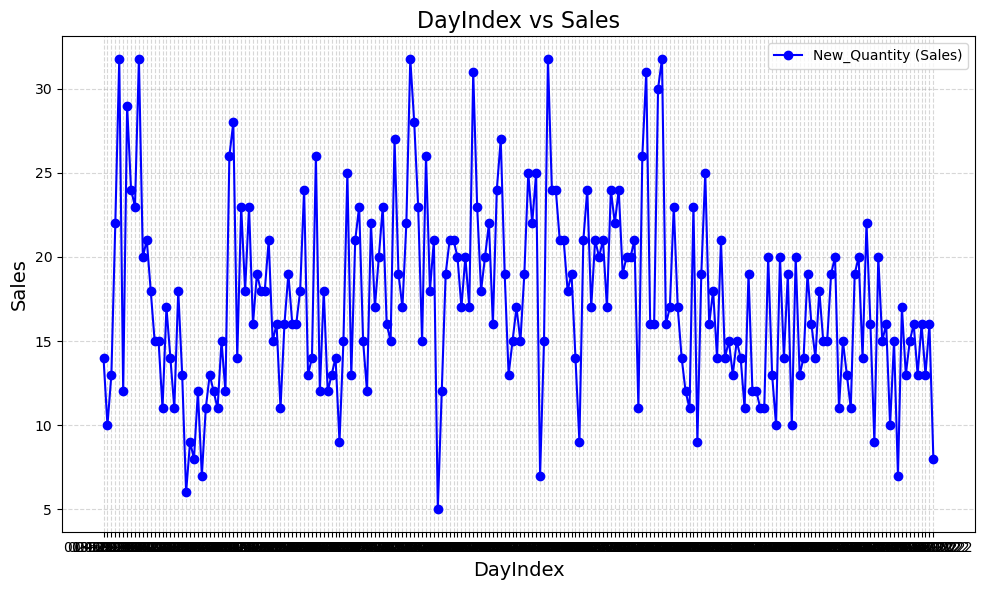

In [28]:
# Plot for DayIndex vs New_Quantity
plt.figure(figsize=(10, 6))
plt.plot(df['Day Index'], df['New_Quantity'], marker='o', linestyle='-', color='blue', label='New_Quantity (Sales)')
plt.title('DayIndex vs Sales', fontsize=16)
plt.xlabel('DayIndex', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


 * Reduced Fluctuation: The second graph shows a smoother pattern with less extreme fluctuations compared to the first graph. This is likely due to the removal of outliers, which can significantly impact the overall trend and variability of the data.
 * Potential for a Weak Upward Trend: The second graph might suggest a very slight upward trend in sales, which was not apparent in the first graph. This could indicate a gradual increase in sales over time, but further analysis with additional data points would be needed to confirm this trend.
 * Caution on Interpretation: It's important to remember that removing outliers can sometimes distort the true nature of the data. While it can help identify underlying patterns, it's crucial to consider the potential impact of outlier removal on the overall analysis. It's recommended to investigate the reasons for the outliers and their potential impact on the conclusions drawn from the data.

# Feature Engineering And EDA

In [31]:
df['Day Index'] = pd.to_datetime(df['Day Index'], format='%d-%m-%Y')


In [32]:
# Create weekends column, 1 if the day is a weekend (Saturday or Sunday) or else 0
df['weekends'] = df['Day Index'].dt.weekday >= 5

# Create columns for each day of the week (Mon, Tue, Wed, Thu, Fri, Sat, Sun)
df['mon'] = (df['Day Index'].dt.dayofweek == 0).astype(int)  
df['tue'] = (df['Day Index'].dt.dayofweek == 1).astype(int)  
df['wed'] = (df['Day Index'].dt.dayofweek == 2).astype(int)  
df['thur'] = (df['Day Index'].dt.dayofweek == 3).astype(int) 
df['fri'] = (df['Day Index'].dt.dayofweek == 4).astype(int)  
df['sat'] = (df['Day Index'].dt.dayofweek == 5).astype(int)  
df['sun'] = (df['Day Index'].dt.dayofweek == 6).astype(int)  

# Create columns for each month (Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec)
df['jan'] = (df['Day Index'].dt.month == 1).astype(int)
df['feb'] = (df['Day Index'].dt.month == 2).astype(int)
df['march'] = (df['Day Index'].dt.month == 3).astype(int)
df['april'] = (df['Day Index'].dt.month == 4).astype(int)
df['may'] = (df['Day Index'].dt.month == 5).astype(int)
df['june'] = (df['Day Index'].dt.month == 6).astype(int)
df['july'] = (df['Day Index'].dt.month == 7).astype(int)
df['august'] = (df['Day Index'].dt.month == 8).astype(int)
df['sep'] = (df['Day Index'].dt.month == 9).astype(int)
df['oct'] = (df['Day Index'].dt.month == 10).astype(int)
df['nov'] = (df['Day Index'].dt.month == 11).astype(int)
df['dec'] = (df['Day Index'].dt.month == 12).astype(int)


In [33]:
df.head()

,Day Index,Quantity,Impressions,Clicks,New_Quantity,weekends,mon,tue,wed,thur,...,march,april,may,june,july,august,sep,oct,nov,dec
0,2021-12-01,14,620,445,14.00,False,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2021-12-02,10,890,433,10.00,False,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,2021-12-03,13,851,424,13.00,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2021-12-04,22,881,427,22.00,True,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2021-12-05,33,678,451,31.78,True,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
df['day'] = pd.to_datetime(df['Day Index']).dt.day_name()  # Add day column

# Group by day and aggregate
df_grouped = df.groupby('day').agg({
    'Quantity': 'sum',
    'Impressions': 'sum',
    'Clicks': 'sum',
    'New_Quantity': 'sum',
}).reset_index()

# Reorder days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_grouped['day'] = pd.Categorical(df_grouped['day'], categories=day_order, ordered=True)
df_grouped = df_grouped.sort_values('day').reset_index(drop=True)

# Print the DataFrame
print(df_grouped)


         day  Quantity  Impressions  Clicks  New_Quantity
0     Monday       565        48363   11102        565.00
1    Tuesday       493        46391   10480        493.00
2  Wednesday       510        44963   10693        510.00
3   Thursday       533        44240   11007        526.56
4     Friday       539        45957   10540        528.56
5   Saturday       543        47407   10779        543.00
6     Sunday       536        47400   11338        534.78


In [35]:
df['month'] = pd.to_datetime(df['Day Index']).dt.month_name()
# Filter for months from December to June
months_to_include = ['December', 'January', 'February', 'March', 'April', 'May', 'June']
df = df[df['month'].isin(months_to_include)]
# Group by month and aggregate
df_monthly = df.groupby('month').agg({
    'Quantity': 'sum',      
    'Impressions': 'sum',    
    'Clicks': 'sum',         
    'New_Quantity': 'sum',   
}).reset_index()

month_order = ['December', 'January', 'February', 'March', 'April', 'May', 'June']

# Reorder rows 
df_monthly['month'] = pd.Categorical(df_monthly['month'], categories=month_order, ordered=True)
df_monthly = df_monthly.sort_values('month').reset_index(drop=True)

print(df_monthly)


      month  Quantity  Impressions  Clicks  New_Quantity
0  December       495        35887   12284        487.56
1   January       533        47464   12314        533.00
2  February       554        42042   14372        547.78
3     March       620        50803   15419        619.78
4     April       599        52857   13480        594.78
5       May       471        47325    4566        471.00
6      June       447        48343    3504        447.00


# Plotting Graphs And Analysis

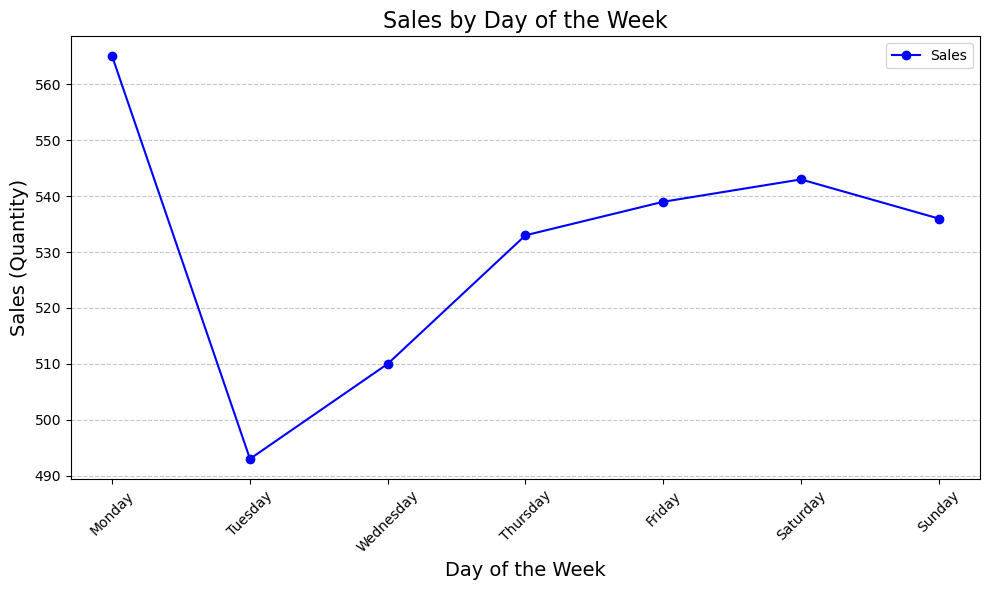

In [37]:
# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['day'], df_grouped['Quantity'], marker='o', linestyle='-', color='b', label='Sales')
plt.title('Sales by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Sales (Quantity)', fontsize=14)
plt.xticks(rotation=45)  # Rotate day names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


###
* **Sales drop on Tuesday:** There is a significant fall in the quantity of sales on Tuesday, the lowest throughout the week. This may be a signal of lower customer activity or interaction on Tuesdays due to lower demand or preference at the very start of the workweek.
* **Sales Recovery and Growth Midweek:** Quantities sold are likely to start growing from Wednesday to Saturday. This growth might be some sort of mid-week recovery, where closer to the weekend, the pace of customers picks up.
* **Peak Sales on Friday and Saturday:** The graph illustrates that the peak sales occur on Friday and Saturday. This can be explained by the sudden rush of consumer activity before the weekend, as people are more engaged in purchasing something or enjoying some form of leisure activity.
* **Sunday Slows Down:** A minor decline is seen on Sundays in the quantities sold, which may indicate a typical weekend slowdown in anticipation of the coming week. This may signal less consumer activities occur on Sundays.
* Overall, sales are higher during the weekend than during the week. The overall pattern is that sales for weekends-that include Fridays and Saturdays-are higher compared to other days. This can be explained by the increased spending due to free time during weekends.

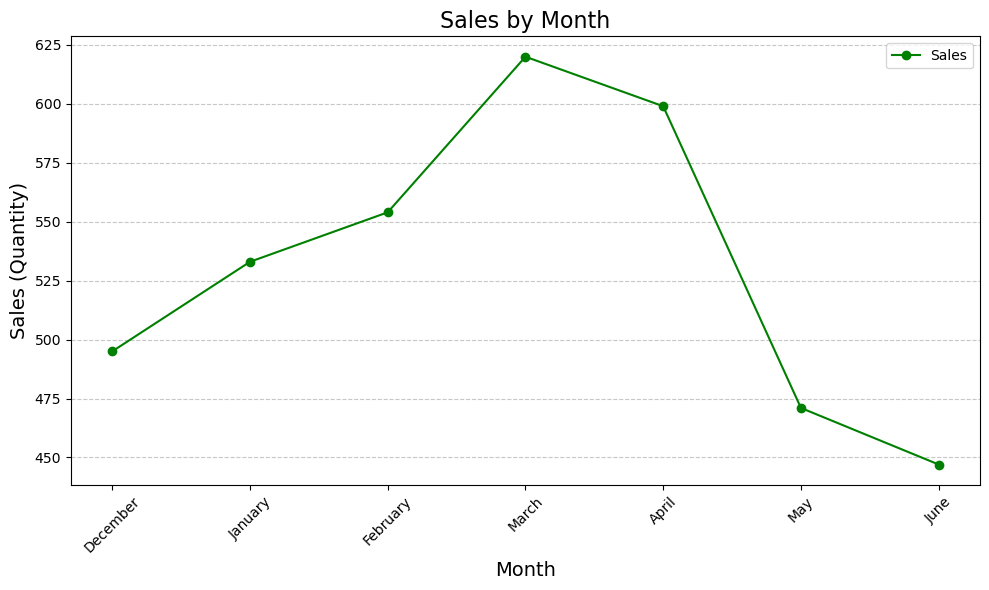

In [39]:
# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(df_monthly['month'], df_monthly['Quantity'], marker='o', linestyle='-', color='g', label='Sales')
plt.title('Sales by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Sales (Quantity)', fontsize=14)
plt.xticks(rotation=45)  # Rotate month names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


###
* **Trend Analysis:** There appears to be a rise in sales from December to April, which peaks around April, from which sales drastically go down throughout May and June.
* **Seasonal Pattern:** The increase in sales from December through April may depict seasonal demand, because of holidays or other factors.             
* **Sudden Fall:** The drop from April to June is sharp; hence, this could be due to seasonal or market factors that caused a drop in demand, a change in consumer behavior, or probably some stock or supply issues.                                                                              
* **Recommendation:** Companies, if this fall from April onwards is predictable, would prepare for those by adjusting their inventories or marketing strategy to lessen the impact of reduced sales during these months.


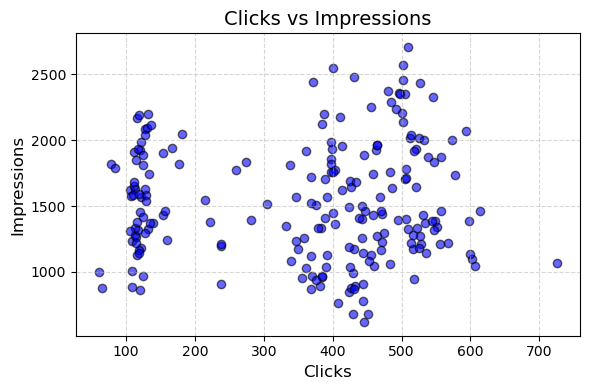

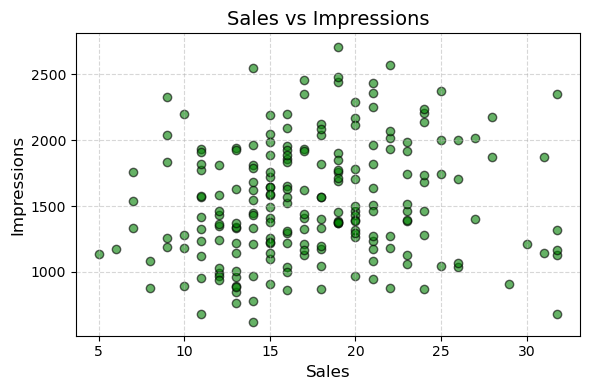

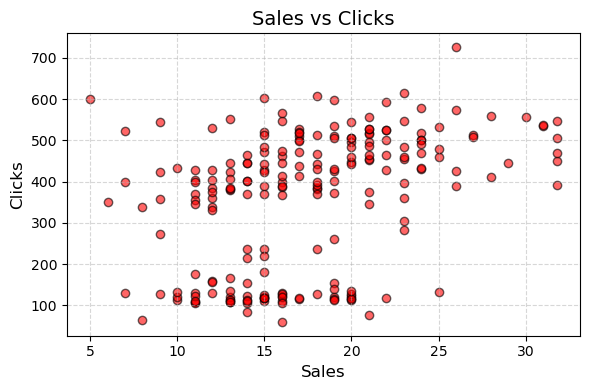

In [41]:
# Scatter plot for Clicks vs Impressions
plt.figure(figsize=(6, 4))
plt.scatter(df['Clicks'], df['Impressions'], color='blue', alpha=0.6, edgecolor='k')
plt.title('Clicks vs Impressions', fontsize=14)
plt.xlabel('Clicks', fontsize=12)
plt.ylabel('Impressions', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Scatter plot for Impressions vs New_Quantity
plt.figure(figsize=(6, 4))
plt.scatter(df['New_Quantity'], df['Impressions'], color='green', alpha=0.6, edgecolor='k')
plt.title('Sales vs Impressions', fontsize=14)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Impressions', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Scatter plot for New_Quantity vs Clicks
plt.figure(figsize=(6, 4))
plt.scatter(df['New_Quantity'], df['Clicks'], color='red', alpha=0.6, edgecolor='k')
plt.title('Sales vs Clicks', fontsize=14)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Clicks', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


###
**Clicks vs Impressions**
* The graph is scattered, and no line indicates a linear relationship between Clicks and Impressions. This means increased Impressions do not necessarily signify increased Clicks.
* The clicks range from about 50 to 700, while impressions range between 500 and 2500-that is a big spread.
* The distribution here would hence indicate that there could be an opportunity to investigate specific data clusters with a view to understand what kind of content performs well in certain ranges, which may be useful for better targeting and content optimization.
   
**Sales vs Impressions**
* Generally speaking, the more impressions, the more sales.
* This may suggest that the high marketing and visibility propel the sales upwards.
* The scattered nature of the data points shows that other factors, other than impressions, are also quite crucial, like the quality of the product, its pricing, and marketing strategies.                                                                                                              

**Sales vs Clicks**
* There is some form of positive correlation between Sales and Clicks. This is because an increased number of clicks calls for an increased propensity in the number of sales.
* Most of the data points are scattered, showing that sales can be influenced not only by clicks but even by other factors.
* Data points show clusters, which tend to suggest that most sales levels will revolve around certain ranges of clicks.


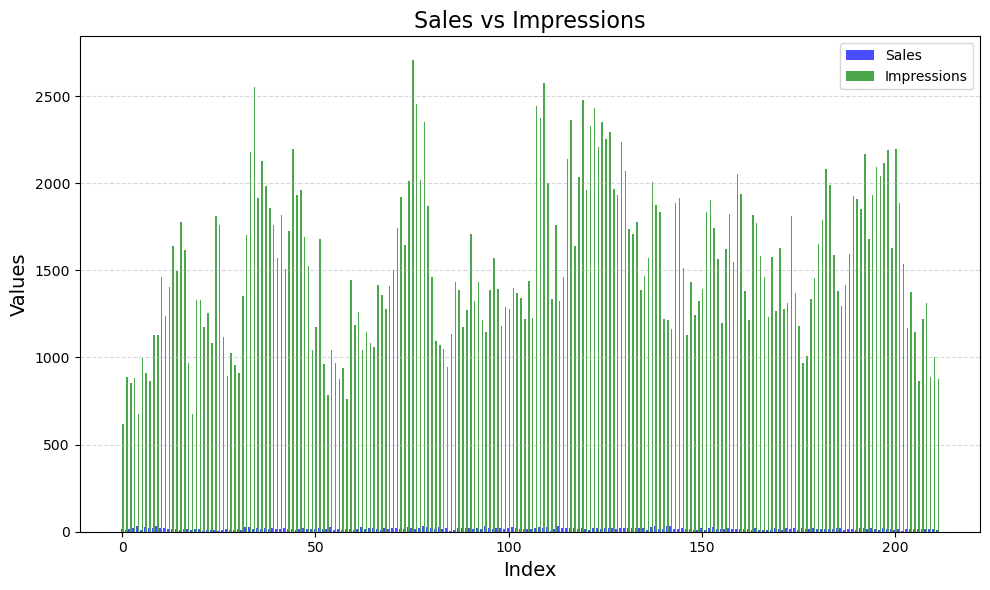

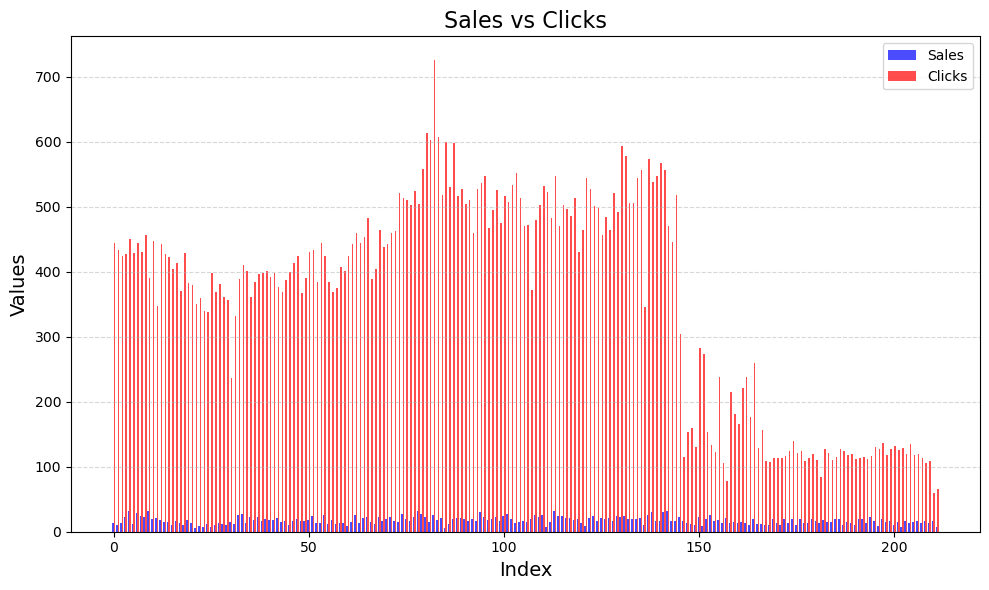

In [43]:
# Bar graph for New_Quantity and Impressions
plt.figure(figsize=(10, 6))
plt.bar(df.index - 0.2, df['New_Quantity'], width=0.4, label='Sales', color='blue', alpha=0.7)
plt.bar(df.index + 0.2, df['Impressions'], width=0.4, label='Impressions', color='green', alpha=0.7)
plt.title('Sales vs Impressions', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Bar graph for New_Quantity and Clicks
plt.figure(figsize=(10, 6))
plt.bar(df.index - 0.2, df['New_Quantity'], width=0.4, label='Sales', color='blue', alpha=0.7)
plt.bar(df.index + 0.2, df['Clicks'], width=0.4, label='Clicks', color='red', alpha=0.7)
plt.title('Sales vs Clicks', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


###
**Sales vs Impressions**
* There is a general trend where high impressions result in high sales, though it is not a linear relationship. The reason is that there are several points with a high level of impression that tend to have low sales, and vice versa.
*  This is indicative of the fact that factors other than impression determine sales.Indeed, the chart points to the importance of impressions because these usually relate to increased sales. However, it should seriously be taken into consideration that the mere existence of impressions itself does not come out to be converted into sales.
* There are other factors, too, such as product quality, pricing, marketing effectiveness, and customer sentiment, that have a major impact on sales, even with massive impression levels.
                                                                                              
**Sales vs Clicks**
* The trend shows a consistent pattern where clicks are always higher than sales. This could indicate that while there is significant interest in the product or service, it is not converting into actual purchases.
* The peak value for clicks is significantly higher than that for sales. This peak could be due to a specific marketing campaign or event that drove a lot of traffic but did not result in a proportional increase in sales.The data suggests that while marketing efforts are successful in attracting clicks, they may not be as effective in converting those clicks into sales.
*  This could be due to various factors such as the quality of the landing page, the pricing of the product, or the overall user experience.

# Correalational Matrix

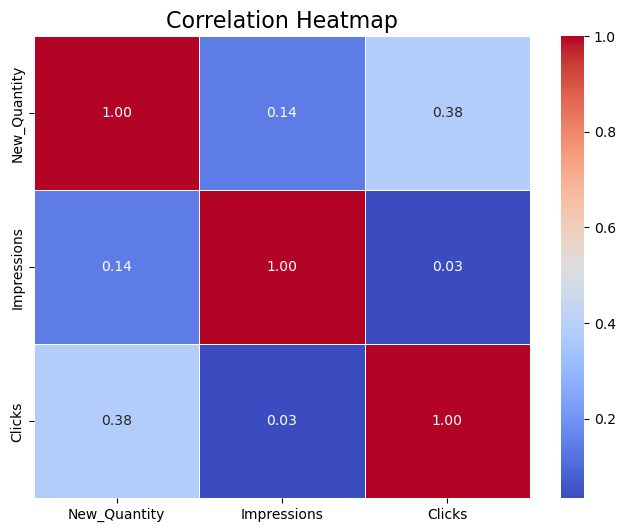

In [46]:
correlation_matrix = df[['New_Quantity', 'Impressions', 'Clicks']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


###
* The above plot is a correlation heat map, showing the correlation coefficients between the New_Quantity, Impressions, and Clicks. This plot uses color gradients from blue to red, with blue representing the lowest and red the highest for that correlation. Also, numerically, these correlations have been shown inside the cells of the plotting.
* All the variables perfectly correlate with themselves, as depicted by having a correlation coefficient of 1.00 and most saturated red color.       
* **New_Quantity vs Impressions:** The New_Quantity and Impressions is related to the correlation coefficient value of 0.14. That can be inferred to mean that with more new quantity, the number of impressions tends to be on the higher side but very weakly.
* **New_Quantity vs Clicks:** The correlation coefficient between New_Quntity and Clicks stands at 0.38, showing a moderately positive correlation. That infers that as the quantity of new items increases, the clicks have a fair increase.                                                        
* **Impressions vs. Clicks:** The correlation coefficient between Impressions and Clicks is 0.03, showing a very weak positive correlation. This therefore implies that Impressions does not relate so much with Clicks.                                                                                 
* Color gradient in this graph should be used for the interpretation of the strength of the correlations. Darker red shows stronger correlations, while lighter blue shows weaker correlations.


# Stationarity Check and Train-Test Split
### Stationarity Check  
- Stationarity in time series refers to a constant mean, variance, and autocovariance over time, ensuring reliable statistical modeling. It is commonly tested using methods like the **Augmented Dickey-Fuller (ADF)** or **Kwiatkowski-Phillips-Schmidt-Shin (KPSS) tests**.

### Train-Test Data  
- Splitting time series data into train (used for model building) and test (used for validation) sets ensures unbiased evaluation of the model's predictive performance. A common practice is to allocate the last segment of the dataset as the test set.


In [49]:
df['Day Index'] = pd.to_datetime(df['Day Index'])
df.set_index('Day Index', inplace=True)


In [50]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['New_Quantity'])
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+': '+str(value))
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is non stationary")

adfuller_test(df['New_Quantity'])

ADF Test Statistic: -4.381419757192786
p-value: 0.00032013185021669184
#Lags Used: 3
Number of Observations Used: 208
Data is stationary


<Axes: xlabel='Day Index'>

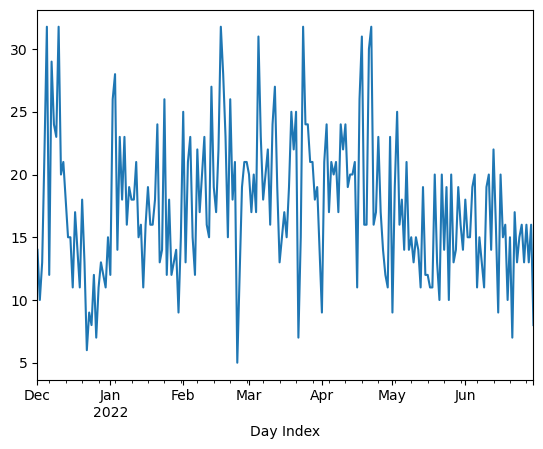

In [51]:
df['New_Quantity'].plot()

In [52]:
train = df.iloc[:-int(len(df) * 0.2)]  # First 80% as train
test = df.iloc[-int(len(df) * 0.2):] 
train['New_Quantity'] = pd.to_numeric(train['New_Quantity'], errors='coerce')

C:\Users\shriy\AppData\Local\Temp\ipykernel_43524\2048791358.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['New_Quantity'] = pd.to_numeric(train['New_Quantity'], errors='coerce')


## AR Model

In [54]:
train = df['New_Quantity'][:-int(len(df) * 0.2)]  # 80% for training
test = df['New_Quantity'][-int(len(df) * 0.2):]  # 20% for testing

# Fit AutoReg (AR) model
model = AutoReg(train, lags=1)  # lags=1 for a simple AR(1) model
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:           New_Quantity   No. Observations:                  170
Model:                     AutoReg(1)   Log Likelihood                -528.512
Method:               Conditional MLE   S.D. of innovations              5.520
Date:                Wed, 27 Nov 2024   AIC                           1063.024
Time:                        10:48:31   BIC                           1072.414
Sample:                    12-02-2021   HQIC                          1066.834
                         - 05-19-2022                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              13.0772      1.399      9.349      0.000      10.336      15.819
New_Quantity.L1     0.2778      0.074      3.764      0.000       0.133       0.422
                                

C:\Users\shriy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


### AR Model Forecast And Error Percentage Calculation

C:\Users\shriy\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


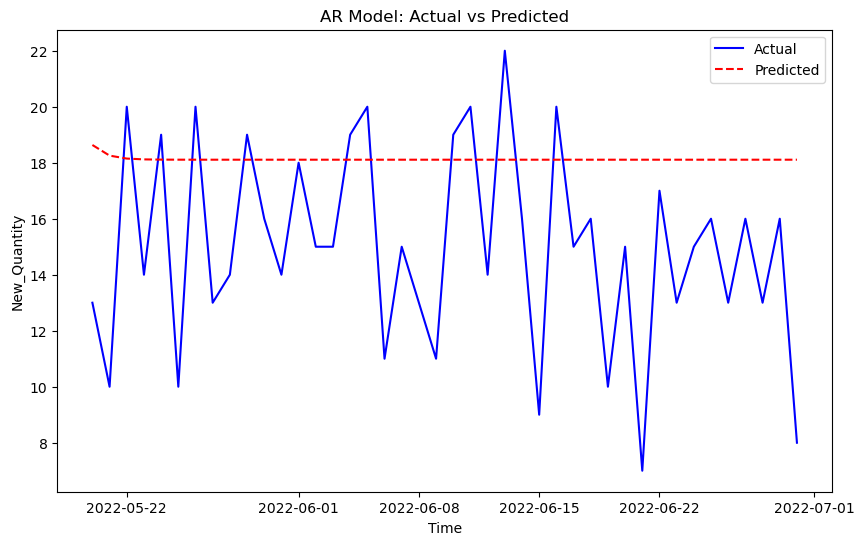

In [56]:
predictions = model_fit.predict(start=len(train), end=len(df)-1, dynamic=False)

# Plot the actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(test.index, predictions, label='Predicted', color='red', linestyle='--')
plt.title('AR Model: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('New_Quantity')
plt.legend()
plt.show()

In [57]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming 'test' is the actual data and 'predictions' is the model's predicted values

# RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))

# MAE
mae = mean_absolute_error(test, predictions)

# MAPE
mape = np.mean(np.abs((test - predictions) / test)) * 100

# Print the results
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')


RMSE: 4.783002466375293
MAE: 3.9526259067032963
MAPE: 33.60515567058601%


1. **RMSE (4.78)**: Indicates moderate prediction errors.  
2. **MAPE (33.61%)**: Suggests the model's predictions deviate by ~33.6%, showing room for improvement.  
3. **Plot Observation**: The flat predicted line fails to capture the variability in actual data, signaling a need for a more robust model.

## MA model

In [60]:
from statsmodels.tsa.arima.model import ARIMA
# Define ARIMA model
train = df.iloc[:-int(len(df) * 0.2)]  # First 80% as train
test = df.iloc[-int(len(df) * 0.2):] 
ma_model = ARIMA(train['New_Quantity'], order=(0, 0, 2))  # Adjust order if needed
ma_results = ma_model.fit()

# Print model summary
print(ma_results.summary())

# Forecast values for the test set
forecast = ma_results.forecast(steps=len(test))
print(forecast)


                               SARIMAX Results                                
Dep. Variable:           New_Quantity   No. Observations:                  170
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -531.902
Date:                Wed, 27 Nov 2024   AIC                           1071.804
Time:                        10:48:32   BIC                           1084.347
Sample:                    12-01-2021   HQIC                          1076.894
                         - 05-19-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.0702      0.579     31.209      0.000      16.935      19.205
ma.L1          0.2663      0.075      3.560      0.000       0.120       0.413
ma.L2          0.0281      0.076      0.371      0.7

C:\Users\shriy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\shriy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\shriy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


### MA Model Forecast And Error Percentage Calculation

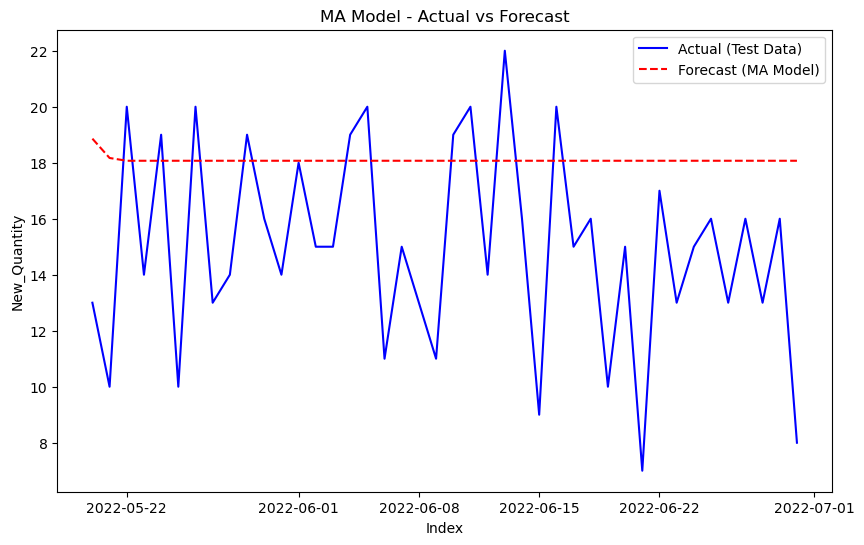

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['New_Quantity'], label="Actual (Test Data)", color="blue")
plt.plot(test.index, forecast, label="Forecast (MA Model)", color="red", linestyle="--")
plt.title("MA Model - Actual vs Forecast")
plt.xlabel("Index")
plt.ylabel("New_Quantity")
plt.legend()
plt.show()

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Actual test values
actual_values = test['New_Quantity']

# Error metrics
rmse = np.sqrt(mean_squared_error(actual_values, forecast))
mae = mean_absolute_error(actual_values, forecast)
mape = np.mean(np.abs((actual_values - forecast) / actual_values)) * 100

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape:.2f}%")


RMSE: 4.764123330419422
MAE: 3.938863055188113
MAPE: 33.47%


1. **RMSE (4.76)**: Indicates moderate prediction errors;  
2. **MAPE (33.47%)**: Suggests the model's predictions deviate by ~33.47%, showing room for improvement.  
3. **Plot Observation**: The flat predicted line fails to capture the variability in actual data, signaling a need for a more robust model.

## ARIMA Model

In [66]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore") 
stepwise_fit = auto_arima (df['New_Quantity'], trace=True, suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1310.167, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1330.022, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1316.861, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1319.250, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1836.368, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1309.172, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1320.257, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1307.180, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1309.175, Time=0.18 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1316.197, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1317.093, Time=0.05 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 1.008 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  212
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -649.590
Date:                Wed, 27 Nov 2024   AIC                           1307.180
Time:                        10:48:33   BIC                           1320.606
Sample:                    12-01-2021   HQIC                          1312.607
                         - 06-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.3168      1.293      1.792      0.073      -0.217       4.851
ar.L1          0.8663      0.073     11.839      0.000       0.723       1.010
ma.L1         -0.6812      0.104     -6.570      0.000      -0.884      -0.478
sigma2        26.8229      2.599     10.320      0.000      21.729      31.917
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 8.66
Prob(Q):                              0.97   Prob(JB):                         0.01
Heteroskedasticity (H):               0.74   Skew:                             0.47
Prob(H) (two-sided):                  0.21   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [67]:
model=ARIMA(train['New_Quantity'],order=(1,0,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           New_Quantity   No. Observations:                  170
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -528.937
Date:                Wed, 27 Nov 2024   AIC                           1065.875
Time:                        10:48:33   BIC                           1078.418
Sample:                    12-01-2021   HQIC                          1070.965
                         - 05-19-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.9804      0.882     20.381      0.000      16.251      19.710
ar.L1          0.8043      0.115      7.016      0.000       0.580       1.029
ma.L1         -0.6023      0.148     -4.073      0.000      -0.892      -0.312
sigma2        29.4866      3.348      8.807      0.000      22.925      36.049
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 5.58
Prob(Q):                              0.81   Prob(JB):                         0.06
Heteroskedasticity (H):               1.01   Skew:                             0.44
Prob(H) (two-sided):                  0.98   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### ARIMA Model Forecast And Error Percentage Calculation

In [69]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)

2022-05-20    16.503085
2022-05-21    16.792194
2022-05-22    17.024725
2022-05-23    17.211752
2022-05-24    17.362177
2022-05-25    17.483166
2022-05-26    17.580477
2022-05-27    17.658745
2022-05-28    17.721696
2022-05-29    17.772328
2022-05-30    17.813052
2022-05-31    17.845806
2022-06-01    17.872150
2022-06-02    17.893339
2022-06-03    17.910382
2022-06-04    17.924089
2022-06-05    17.935113
2022-06-06    17.943981
2022-06-07    17.951113
2022-06-08    17.956849
2022-06-09    17.961463
2022-06-10    17.965174
2022-06-11    17.968158
2022-06-12    17.970559
2022-06-13    17.972490
2022-06-14    17.974042
2022-06-15    17.975291
2022-06-16    17.976296
2022-06-17    17.977104
2022-06-18    17.977754
2022-06-19    17.978277
2022-06-20    17.978697
2022-06-21    17.979035
2022-06-22    17.979307
2022-06-23    17.979526
2022-06-24    17.979702
2022-06-25    17.979843
2022-06-26    17.979957
2022-06-27    17.980049
2022-06-28    17.980122
2022-06-29    17.980182
2022-06-30    17

<Axes: xlabel='Day Index'>

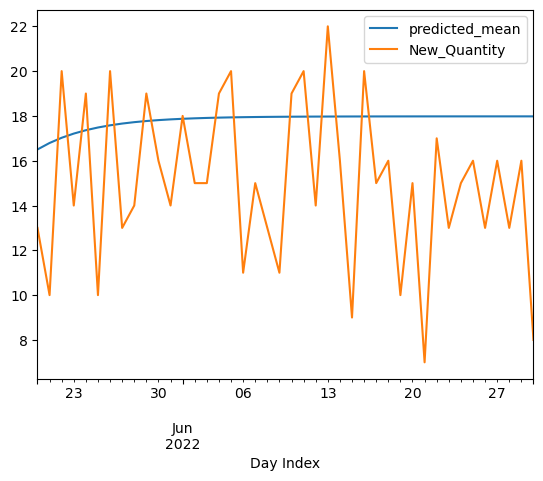

In [70]:
pred.plot(legend=True)
test['New_Quantity'].plot(legend=True)

In [71]:
arima_rmse = np.sqrt(mean_squared_error(pred,test['New_Quantity']))
arima_mae = mean_absolute_error(test['New_Quantity'], pred)
arima_mape = np.mean(np.abs((test['New_Quantity'] - pred) / test['New_Quantity'])) * 100

print(f"RMSE: {arima_rmse}")
print(f"MAE: {arima_mae}")
print(f"MAPE: {arima_mape:.2f}%")

RMSE: 4.568684590842098
MAE: 3.8076933635424575
MAPE: 32.17%


1. **RMSE (4.57)**: Shows a slight improvement in prediction accuracy compared to the previous model.  
2. **MAPE (32.17%)**: Indicates reduced error percentage, but predictions still deviate significantly from actual values.  
3. **Plot Observation**: Predicted values (blue line) capture the overall trend slightly better but still fail to represent the high fluctuations in actual data.

### Hyperparameter Tuning And Residual Plot Of ARIMA

In [74]:
from statsmodels.tsa.arima.model import ARIMA
import itertools
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define parameter ranges for ARIMA (p, d, q)
p = d = q = range(0, 3)  # Non-seasonal components

# Parameter grid
param_grid = list(itertools.product(p, d, q))

# Best model initialization
best_aic = np.inf
best_params = None
best_model = None
iterations = 0  # Counter for iterations

# Hyperparameter tuning loop (limit to 50 iterations)
for params in param_grid:
    if iterations >= 50:
        break  # Stop after 50 iterations
    try:
        # Fit ARIMA model with the current combination of parameters
        model = ARIMA(df['New_Quantity'], 
                      order=(params[0], params[1], params[2])).fit()
        
        # Check if AIC is valid and update best model if necessary
        if model.aic < best_aic:
            best_aic = model.aic
            best_params = params
            best_model = model
            print(f"New Best Model - AIC: {best_aic}, Params: {best_params}")  # Debugging info
        
        iterations += 1  # Increment the counter

    except Exception as e:
        # Print out the error message and skip this combination
        print(f"Error with parameters {params}: {e}")
        continue  # Skip models that fail to fit

# Display results after looping
if best_model is not None:
    print(f"Best Parameters: {best_params}")
    print(f"Best AIC: {best_aic}")

    # Calculate RMSE
    tuned_arima_rmse = np.sqrt(mean_squared_error(df['New_Quantity'], best_model.fittedvalues))
    print(f"RMSE: {tuned_arima_rmse}")

    # Calculate MAE
    tuned_arima_mae = mean_absolute_error(df['New_Quantity'], best_model.fittedvalues)
    print(f"MAE: {tuned_arima_mae}") 

    # Calculate MAPE
    tuned_arima_mape = np.mean(np.abs((df['New_Quantity'] - best_model.fittedvalues) / df['New_Quantity'])) * 100
    print(f"MAPE: {tuned_arima_mape}%")
else:
    print("No valid ARIMA models were found.")



New Best Model - AIC: 1330.022402047844, Params: (0, 0, 0)
New Best Model - AIC: 1319.2502611111804, Params: (0, 0, 1)
New Best Model - AIC: 1306.849600915778, Params: (0, 1, 1)
Best Parameters: (0, 1, 1)
Best AIC: 1306.849600915778
RMSE: 5.38638763019263
MAE: 4.191267578794521
MAPE: 27.829034915503158%


Text(0, 0.5, 'Residuals')

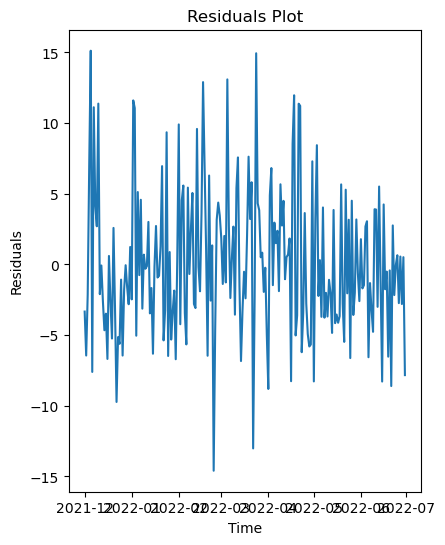

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

p = 1 
d = 0  
q = 1
arima_model = ARIMA(df['New_Quantity'], order=(p, d, q)).fit()

# Access residuals from the fitted ARIMA model
residuals = arima_model.resid

# Plot residuals
plt.figure(figsize=(10, 6))

# Residual plot (time series of residuals)
plt.subplot(1, 2, 1)
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Time')
plt.ylabel('Residuals')


1. **Residual Plot Observation**: The residuals fluctuate around zero but show some variability, suggesting the model is not fully capturing the patterns in the data.  

2. **MAPE (27.83%)**: Indicates a slight improvement in percentage error compared to previous models, but accuracy still needs enhancement.  

3. **RMSE (5.39)**: Higher than the earlier models, signaling an increase in prediction errors despite better percentage error (MAPE).

### SARIMA Model

In [78]:
from datetime import timedelta
from  pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

In [79]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA model parameters
# Adjust (p, d, q) for non-seasonal components and (P, D, Q, s) for seasonal components
p, d, q = 1, 1, 1  # Non-seasonal
P, D, Q, s = 1, 1, 1, 12  # Seasonal (12 for monthly seasonality)

# Fit the SARIMA model
sarima_model = SARIMAX(df['New_Quantity'], 
                       order=(p, d, q), 
                       seasonal_order=(P, D, Q, s), 
                       enforce_stationarity=False, 
                       enforce_invertibility=False)

sarima_result = sarima_model.fit()

# Display the SARIMA model summary
print(sarima_result.summary())


                                     SARIMAX Results                                      
Dep. Variable:                       New_Quantity   No. Observations:                  212
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -573.368
Date:                            Wed, 27 Nov 2024   AIC                           1156.736
Time:                                    10:48:36   BIC                           1172.837
Sample:                                12-01-2021   HQIC                          1163.261
                                     - 06-30-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1137      0.086      1.324      0.186      -0.055       0.282
ma.L1         -0.8957      0.045   

### Plotting Forescate And Error Percentage Calculation

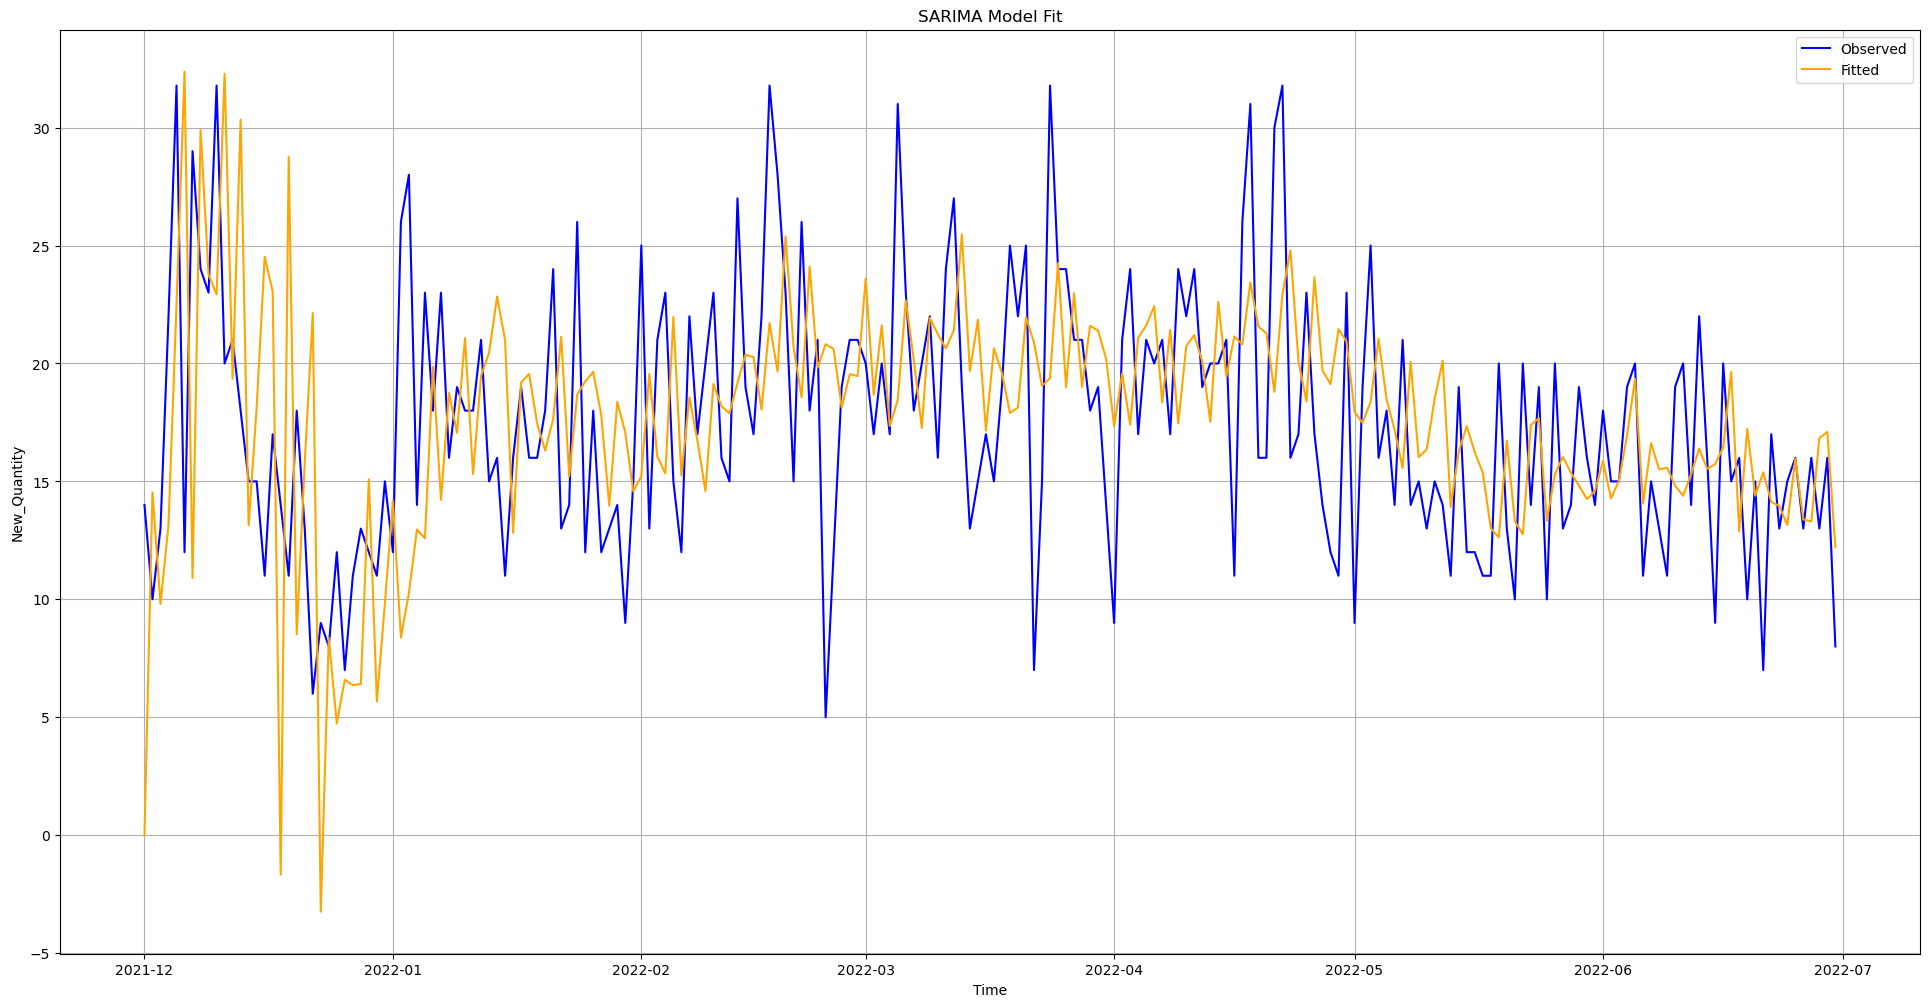

In [81]:
# Plot observed vs. fitted values
plt.figure(figsize=(24, 12))
plt.plot(df.index, df['New_Quantity'], label='Observed', color='blue')
plt.plot(df.index, sarima_result.fittedvalues, label='Fitted', color='orange')
plt.title('SARIMA Model Fit')
plt.xlabel('Time')
plt.ylabel('New_Quantity')
plt.legend()
plt.grid()
plt.show()


In [82]:
# RMSE
sarima_rmse = np.sqrt(mean_squared_error(df['New_Quantity'], sarima_result.fittedvalues))

# MAE
sarima_mae = np.mean(np.abs(df['New_Quantity'] - sarima_result.fittedvalues))

# MAPE
sarima_mape = np.mean(np.abs((df['New_Quantity'] - sarima_result.fittedvalues) / df['New_Quantity'])) * 100

# Print all metrics
print(f"RMSE: {sarima_rmse}")
print(f"MAE: {sarima_mae}")
print(f"MAPE: {sarima_mape}%")


RMSE: 6.319521997165232
MAE: 4.8957917769934785
MAPE: 32.985226942246875%


**1.RMSE (6.32):** Indicates higher prediction errors, suggesting this model is less accurate compared to previous attempts.                                                            
**2.MAPE (32.99%):** Reflects that predictions deviate by nearly 33% on average, leaving room for significant improvement.                                                                 
**3.Plot Observation:** The graph shows that the SARIMA model is able to capture the overall trend and seasonality of the data.

### Hyperparameter Tuning And Residual Plot Of SARIMA

In [85]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define parameter ranges
p = d = q = range(0, 3)  # Non-seasonal components
P = D = Q = range(0, 3)  # Seasonal components
s = [7, 12]  # Seasonal periods

# Parameter grid
param_grid = list(itertools.product(p, d, q, P, D, Q, s))

# Best model initialization
best_aic = np.inf
best_params = None
best_model = None
iterations = 0  # Counter for iterations

# Hyperparameter tuning loop (limit to 50 iterations)
for params in param_grid:
    if iterations >= 50:
        break  # Stop after 50 iterations
    try:
        # Fit SARIMA model with the current combination of parameters
        model = SARIMAX(df['New_Quantity'], 
                        order=(params[0], params[1], params[2]), 
                        seasonal_order=(params[3], params[4], params[5], params[6])).fit(disp=False)
        
        # Check if AIC is valid and update best model if necessary
        if model.aic < best_aic:
            best_aic = model.aic
            best_params = params
            best_model = model
            print(f"New Best Model - AIC: {best_aic}, Params: {best_params}")  # Debugging info
        
        iterations += 1  # Increment the counter

    except Exception as e:
        # Print out the error message and skip this combination
        print(f"Error with parameters {params}: {e}")
        continue  # Skip models that fail to fit

# Display results after looping
if best_model is not None:
    print(f"Best Parameters: {best_params}")
    print(f"Best AIC: {best_aic}")

    # Calculate RMSE
    tuned_sarima_rmse = np.sqrt(mean_squared_error(df['New_Quantity'], best_model.fittedvalues))
    print(f"RMSE: {tuned_sarima_rmse}")

    # Calculate MAE
    tuned_sarima_mae = mean_absolute_error(df['New_Quantity'], best_model.fittedvalues)
    print(f"MAE: {tuned_sarima_mae}")

    # Calculate MAPE
    tuned_sarima_mape = np.mean(np.abs((df['New_Quantity'] - best_model.fittedvalues) / df['New_Quantity'])) * 100
    print(f"MAPE: {tuned_sarima_mape}%")
else:
    print("No valid SARIMA models were found.")


New Best Model - AIC: 1836.36837468558, Params: (0, 0, 0, 0, 0, 0, 7)
New Best Model - AIC: 1684.8136377612489, Params: (0, 0, 0, 0, 0, 1, 7)
New Best Model - AIC: 1678.661633510696, Params: (0, 0, 0, 0, 0, 1, 12)
New Best Model - AIC: 1597.8106710121228, Params: (0, 0, 0, 0, 0, 2, 7)
New Best Model - AIC: 1400.844638638947, Params: (0, 0, 0, 0, 1, 0, 7)
New Best Model - AIC: 1360.5939663014115, Params: (0, 0, 0, 0, 1, 0, 12)
New Best Model - AIC: 1311.3175437620428, Params: (0, 0, 0, 0, 1, 1, 7)
New Best Model - AIC: 1286.238985509628, Params: (0, 0, 0, 0, 1, 1, 12)
New Best Model - AIC: 1279.2920997050587, Params: (0, 0, 0, 0, 2, 2, 12)
Best Parameters: (0, 0, 0, 0, 2, 2, 12)
Best AIC: 1279.2920997050587
RMSE: 10.781569982262255
MAE: 7.592526191498689
MAPE: 50.352459826917226%


Text(0, 0.5, 'Residuals')

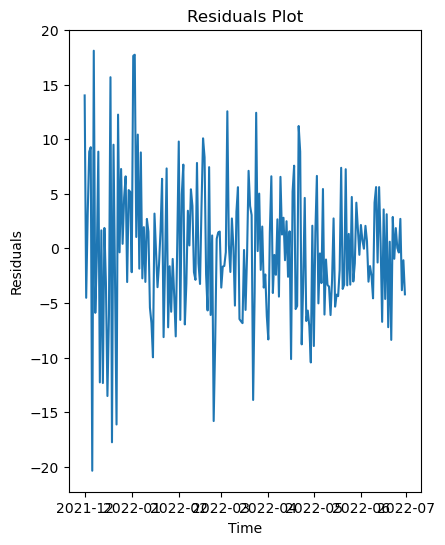

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Example: Fit your SARIMA model (replace with your parameters)
#sarima_model = SARIMAX(df['New_Quantity'], order=(p,d,q), seasonal_order=(P,D,Q,s)).fit()

# Access residuals from the fitted model
residuals = sarima_result.resid

# Plot residuals
plt.figure(figsize=(10, 6))

# Residual plot (time series of residuals)
plt.subplot(1, 2, 1)
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Time')
plt.ylabel('Residuals')

**1. Residuals Plot:** In this plot, we can see that the residuals are not evenly distributed around zero. There are some clusters of points above and below zero, which suggests that the model may not be capturing all of the underlying patterns in the data.

**2. RMSE:** The RMSE is 10.78, which is relatively high. This suggests that the model is not a very good fit for the data.

**3. MAE:** The MAE is 7.59, which is also relatively high. This again suggests that the model is not a very good fit for the data.

**4. MAPE:** The MAPE is 50.35%, which is very high. This suggests that the model is a very poor fit for the data.

# ARIMAX Model

In [89]:
from statsmodels.tsa.arima.model import ARIMA

# Define dependent variable
y = df['New_Quantity']

# Define exogenous variables
exog = df[['Impressions', 'Clicks', 'mon', 'tue', 'wed', 'thur', 'march', 'april', 
           'may', 'june', 'july', 'august', 'sep', 'oct', 'nov', 'dec']]
from statsmodels.tsa.arima.model import ARIMA

# Define ARIMA parameters
p, d, q = 1, 0, 1  # Replace with your values or tuned parameters

# Fit ARIMAX model
arimax_model = ARIMA(y, order=(1,0,1), exog=exog).fit()

# Display model summary
print(arimax_model.summary())


                               SARIMAX Results                                
Dep. Variable:           New_Quantity   No. Observations:                  212
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -637.476
Date:                Wed, 27 Nov 2024   AIC                           1314.952
Time:                        10:48:54   BIC                           1382.083
Sample:                    12-01-2021   HQIC                          1342.085
                         - 06-30-2022                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.2998      3.090      3.334      0.001       4.244      16.355
Impressions     0.0006      0.001      0.577      0.564      -0.001       0.002
Clicks          0.0165      0.006      2.927    

### Plotting Forecasting Data And Error Percentage

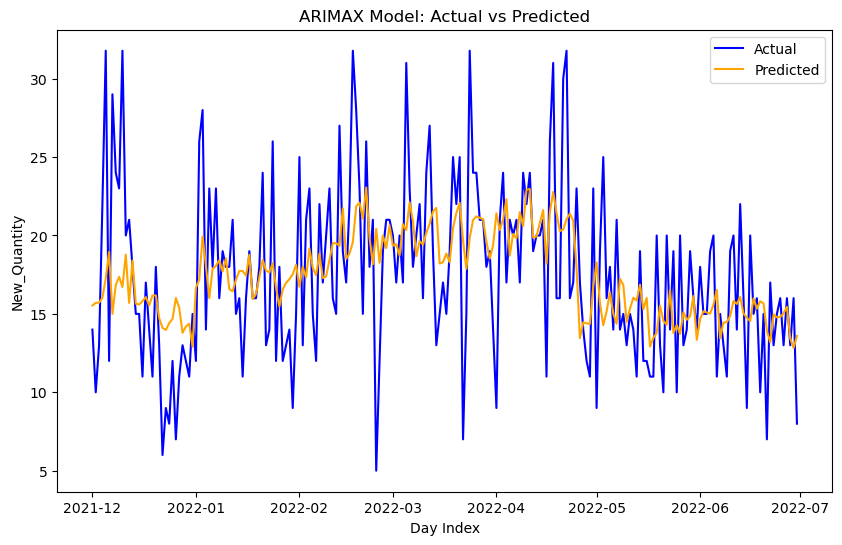

In [91]:
# Predict values
df['Predicted'] = arimax_model.predict(start=0, end=len(y) - 1, exog=exog)
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(df['New_Quantity'], label='Actual', color='blue')
plt.plot(df['Predicted'], label='Predicted', color='orange')
plt.title('ARIMAX Model: Actual vs Predicted')
plt.xlabel('Day Index')
plt.ylabel('New_Quantity')
plt.legend()
plt.show()


In [92]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate metrics
arimax_rmse = mean_squared_error(df['New_Quantity'], df['Predicted'], squared=False)
arimax_mae = mean_absolute_error(df['New_Quantity'], df['Predicted'])
arimax_mape = (abs(df['New_Quantity'] - df['Predicted']) / df['New_Quantity']).mean() * 100

# Print results
print(f"RMSE: {arimax_rmse}")
print(f"MAE: {arimax_mae}")
print(f"MAPE: {arimax_mape:.2f}%")


RMSE: 4.893930774509341
MAE: 3.7758142224665625
MAPE: 25.42%


**1. ARIMAX Model Fit:** The ARIMAX model appears to capture the general trend and seasonality of the data.                                                                                       
**2. RMSE:** The RMSE of 4.89 indicates that, on average, the model's predictions are off by about 4.89 units from the actual values. This is a relatively low RMSE, suggesting a reasonably good fit.    
**3. MAE:** The MAE of 3.78 indicates that, on average, the absolute difference between the predicted and actual values is 3.78 units. This is also a relatively low MAE, further supporting the model's fit.                                                                                   
**4. MAPE:**. This is a moderate MAPE, suggesting that the model's predictions are reasonably accurate, but there is still room for improvement.

### Hyperparameter Tuning And Residual Plot Of ARIMAx

In [95]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Define evaluation metrics function
def evaluate_model(actual, predicted):
    """
    Calculate RMSE, MAE, and MAPE for model evaluation.
    """
    rmse = mean_squared_error(actual, predicted, squared=False)
    mae = mean_absolute_error(actual, predicted)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return rmse, mae, mape

# Define parameter grid
p_values = range(0, 3)  # Adjust the range based on your dataset
d_values = range(0, 2)
q_values = range(0, 3)

# Prepare to store results
best_aic = float("inf")
tuned_arimax_rmse = float("inf")  # Initialize best_rmse before the loop
tuned_arimax_mae = float("inf")  # Initialize best_mae before the loop
tuned_arimax_mape = float("inf")  # Initialize best_mape before the loop
best_params = None
best_model = None

# Perform grid search
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                # Fit ARIMAX model with exogenous variables
                model = ARIMA(y, order=(p, d, q), exog=exog).fit()
                
                # Predict using the model
                predicted = model.predict(start=0, end=len(y)-1, exog=exog)
                
                # Calculate evaluation metrics
                rmse, mae, mape = evaluate_model(y, predicted)
                
                # Update best model based on AIC
                if model.aic < best_aic:
                    best_aic = model.aic
                    best_params = (p, d, q)
                    best_model = model
                    tuned_arimax_rmse = rmse
                    tuned_arimax_mae = mae
                    tuned_arimax_mape = mape
                    
            except Exception as e:
                continue

# Output the best parameters and metrics
print(f"Best Parameters: {best_params}")
print(f"Best AIC: {best_aic}")
print(f"Best RMSE: {tuned_arimax_rmse}")
print(f"Best MAE: {tuned_arimax_mae}")
print(f"Best MAPE: {tuned_arimax_mape:.2f}%")



Best Parameters: (0, 0, 1)
Best AIC: 1312.9372057359624
Best RMSE: 4.893762350264157
Best MAE: 3.781732171124187
Best MAPE: 25.48%


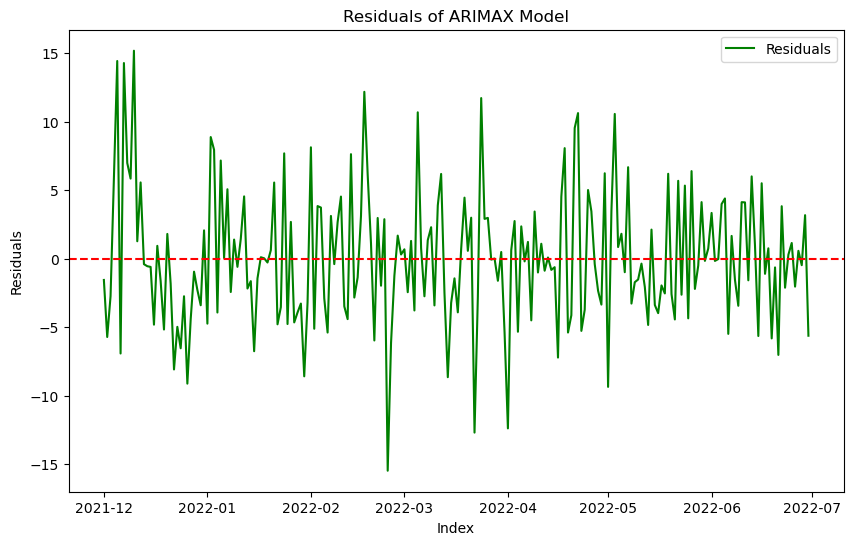

In [96]:
residuals = best_model.resid

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='green')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals of ARIMAX Model')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.legend()
plt.show()

**RMSE:** A lower RMSE means the model's predictions are, on average, closer to the actual values. The reduction in RMSE confirms that the tuned model is making more accurate forecasts.              
**MAE:** Similar to RMSE, a lower MAE indicates better predictive accuracy. The decrease in MAE further supports the improved performance of the tuned model.                                     
**MAPE:** A lower MAPE implies that the model's percentage errors are smaller. The reduction in MAPE shows that the tuned model is making more reliable predictions, especially in terms of relative error   
**Residuals Plot:** In this plot, we can see that the residuals are not evenly distributed around zero. There are some clusters of points above and below zero, which suggests that the model may not be capturing all of the underlying patterns in the data. 

# SARIMAX Model

In [99]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
y = df['New_Quantity']  # The dependent variable (target)
exog = df[['Impressions', 'Clicks', 'mon', 'tue', 'wed', 'thur', 'march', 'april', 
           'may', 'june', 'july', 'august', 'sep', 'oct', 'nov', 'dec']]  # Exogenous variables
sarimax_model = SARIMAX(y, 
                        order=(1, 0, 1),  # ARIMA order (p, d, q)
                        seasonal_order=(1, 1, 1, 12),  # Seasonal order (P, D, Q, s)
                        exog=exog).fit()  # Exogenous variables
predictions = sarimax_model.predict(start=0, end=len(y)-1, exog=exog)

### Plotting Forecasting Data And Error Percentage

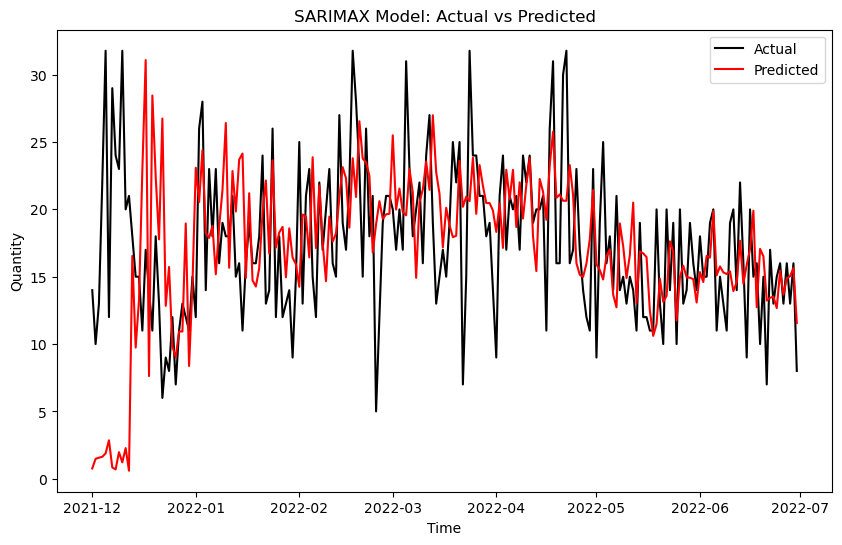

In [101]:
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.plot(y, label='Actual', color='black')  # Plot the actual values
plt.plot(predictions, label='Predicted', color='red')  # Plot the predicted values
plt.title('SARIMAX Model: Actual vs Predicted')  # Title of the plot
plt.xlabel('Time')  # X-axis label
plt.ylabel('Quantity')  # Y-axis label
plt.legend()  # Display the legend to distinguish actual vs predicted
plt.show()  # Show the plot

In [102]:
import numpy as np

# Calculate RMSE (Root Mean Squared Error)
sarimax_rmse = np.sqrt(np.mean((y - predictions) ** 2))

# Calculate MAE (Mean Absolute Error)
sarimax_mae = np.mean(np.abs(y - predictions))

# Calculate MAPE (Mean Absolute Percentage Error)
sarimax_mape = np.mean(np.abs((y - predictions) / y)) * 100

# Print the evaluation metrics
print(f"RMSE: {sarimax_rmse:.2f}")
print(f"MAE: {sarimax_mae:.2f}")
print(f"MAPE: {sarimax_mape:.2f}%")


RMSE: 7.24
MAE: 5.06
MAPE: 33.09%


**SARIMAX Model:** Overall, the ARIMAX model appears to be a decent fit for the data, capturing the overall trend and some of the seasonal patterns.                                              
**RMSE:**  The RMSE of 7.24 suggests that, on average, the model's predictions are off by about 7.24 units.                                                                                          
**MAE:** The MAE of 5.06 suggests that, on average, the model's predictions are off by about 5.06 units.                                                                                       
**MAPE:** The MAPE of 33.09% suggests that, on average, the model's predictions are off by about 33.09% compared to the actual values

### Hyperparameter Tuning And Residual Plot Of SARIMAX

In [105]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
# Define the target variable and exogenous variables
y = df['New_Quantity']
exog = df[['Impressions', 'Clicks', 'mon', 'tue', 'wed', 'thur', 'march', 'april', 'may', 'june', 'july', 'august', 'sep', 'oct', 'nov', 'dec']]

# Handle missing values by filling or dropping (for example)
# df.fillna(0, inplace=True)  # or df.dropna(inplace=True), depending on your approach

# Define parameter grid (simplified for quicker testing)
p_values = range(0, 2)  # Reduce range for quicker testing
d_values = range(0, 2)
q_values = range(0, 2)
seasonal_p = range(0, 1)  # Reduce range for seasonal p
seasonal_d = range(0, 1)  # Reduce range for seasonal d
seasonal_q = range(0, 1)  # Reduce range for seasonal q
seasonal_s = [12]         # Assuming monthly data

# Initialize variables to store best model info
best_aic = float("inf")
best_params = None
best_model = None

# Perform grid search for SARIMAX model
for p in p_values:
    for d in d_values:
        for q in q_values:
            for sp in seasonal_p:
                for sd in seasonal_d:
                    for sq in seasonal_q:
                        for s in seasonal_s:
                            try:
                                seasonal_order = (sp, sd, sq, s)
                                # Fit SARIMAX model with exogenous variables
                                model = SARIMAX(y, exog=exog, order=(p, d, q), seasonal_order=seasonal_order).fit(disp=False)
                                
                                # Check AIC and update best model if needed
                                if model.aic < best_aic:
                                    best_aic = model.aic
                                    best_params = (p, d, q, sp, sd, sq, s)
                                    best_model = model
                            except Exception as e:
                                # Print error message if model fitting fails
                                print(f"Error with p={p}, d={d}, q={q}, seasonal_order={seasonal_order}: {e}")
                                continue

# Output the best parameters and AIC
print(f"Best Parameters: {best_params}")
print(f"Best AIC: {best_aic}")
# Predictions from the best model
predictions = best_model.predict(start=0, end=len(y)-1, exog=exog)

    # Calculate evaluation metrics
tuned_sarimax_rmse = np.sqrt(mean_squared_error(y, predictions))
tuned_sarimax_mae = mean_absolute_error(y, predictions)
tuned_sarimax_mape = np.mean(np.abs((y - predictions) / y)) * 100

    # Output the evaluation metrics
print(f"RMSE: {tuned_sarimax_rmse}")
print(f"MAE: {tuned_sarimax_mae}")
print(f"MAPE: {tuned_sarimax_mape:.2f}%")

Best Parameters: (1, 0, 0, 0, 0, 0, 12)
Best AIC: 1325.9938015868447
RMSE: 5.070608921053089
MAE: 3.8849237988478436
MAPE: 25.88%


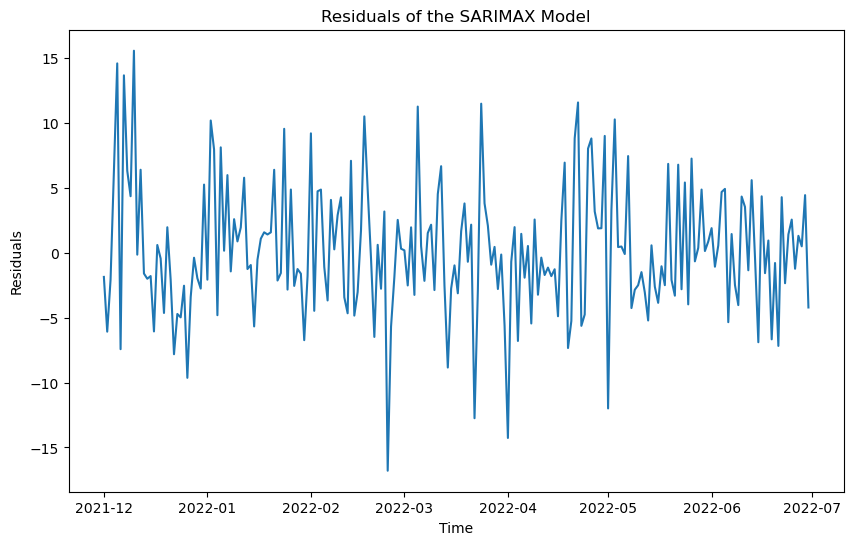

In [106]:
residuals = y - predictions
import matplotlib.pyplot as plt

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of the SARIMAX Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

**RMSE:** The RMSE of 5.07 suggests that, on average, the model's predictions are off by about 5.07 units.                                                                                     
**MAE:** The MAE of 3.88 suggests that, on average, the model's predictions are off by about 3.88 units.                                                                                         
**MAPE:** The MAPE of 25.88% suggests that, on average, the model's predictions are off by about 25.88% compared to the actual                                                                
**Residuals Plot:** In this plot, we can see that the residuals are not evenly distributed around zero. There are some clusters of points above and below zero, which suggests that the model may not be capturing all of the underlying patterns in the data.

# Analysis Table

In [109]:
import pandas as pd

# Assuming the evaluation metrics for each model are calculated
results_dict = {
    'Model_name': ['arima', 'sarima', 'arimax', 'sarimax'],
    'mae': [arima_mae, sarima_mae, arimax_mae, sarimax_mae],
    'rmse': [arima_rmse, sarima_rmse, arimax_rmse, sarimax_rmse],
    'mape': [arima_mape, sarima_mape, arimax_mape, sarimax_mape],
    'tuned_mae': [tuned_arima_mae, tuned_sarima_mae, tuned_arimax_mae, tuned_sarimax_mae],
    'tuned_rmse': [tuned_arima_rmse, tuned_sarima_rmse, tuned_arimax_rmse, tuned_sarimax_rmse],
    'tuned_mape': [tuned_arima_mape, tuned_sarima_mape, tuned_arimax_mape, tuned_sarimax_mape]
}

# Convert dictionary into a DataFrame
results_df = pd.DataFrame(results_dict)

# Display the table
print(results_df)

  Model_name       mae      rmse       mape  tuned_mae  tuned_rmse  tuned_mape
0      arima  3.807693  4.568685  32.168950   4.191268    5.386388   27.829035
1     sarima  4.895792  6.319522  32.985227   7.592526   10.781570   50.352460
2     arimax  3.775814  4.893931  25.422601   3.781732    4.893762   25.482825
3    sarimax  5.057677  7.243267  33.091024   3.884924    5.070609   25.884811


## CONCLUSION
- While ARIMAX has the lowest error metrics (MAE: 3.78, RMSE: 4.89, MAPE: 25.48), SARIMAX aligns better with the actual data trends, capturing seasonality and fluctuations effectively.
- SARIMAX visually matches the ups and downs of demand trends more closely, reflecting real-world patterns that are critical for actionable and reliable long-term forecasts.
- SARIMAX is specifically designed to handle both seasonality and external influences (exogenous variables). This makes it ideal for retail demand forecasting, where periodic variations are significant
- Despite slightly higher error metrics, its graphical accuracy ensures that it captures real-world demand trends, making it more reliable for long-term use.The ability to handle seasonal components ensures robustness for retail scenarios with recurring patterns